In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Задание 1.
1. Скачать данные по ссылке
https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк

In [2]:
df = pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


In [3]:
df['Memory_Amount'].value_counts()

256     508
1024    250
128     177
512     140
500     132
32       45
64       17
2048     16
16       10
180       5
240       1
8         1
508       1
Name: Memory_Amount, dtype: int64

### 1.1 Изучите количество памяти с помощью matplotlib

Text(0, 0.5, 'Количество ноутбуков')

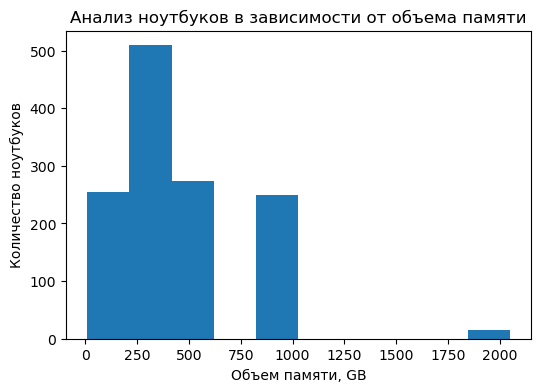

In [4]:
plt.figure(figsize=(6, 4))
plt.hist(df['Memory_Amount'])
plt.title('Анализ ноутбуков в зависимости от объема памяти')
plt.xlabel('Объем памяти, GB')
plt.ylabel('Количество ноутбуков')

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib

Text(0, 0.5, 'Количество ноутбуков')

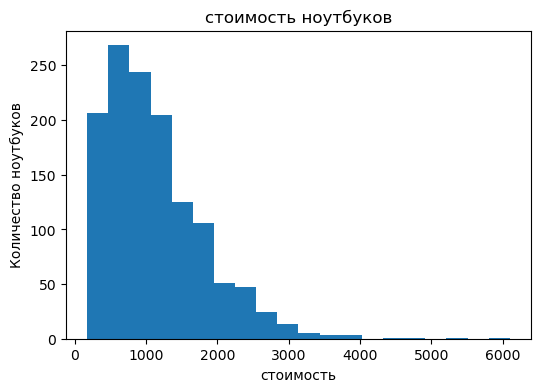

In [5]:
plt.figure(figsize=(6, 4))
plt.hist(df['Price_euros'], bins=20)
plt.title('стоимость ноутбуков')
plt.xlabel('стоимость')
plt.ylabel('Количество ноутбуков')

### 1.3 Изучите вес ноутбуков с помощью matplotlib

Text(0, 0.5, 'Количество ноутбуков')

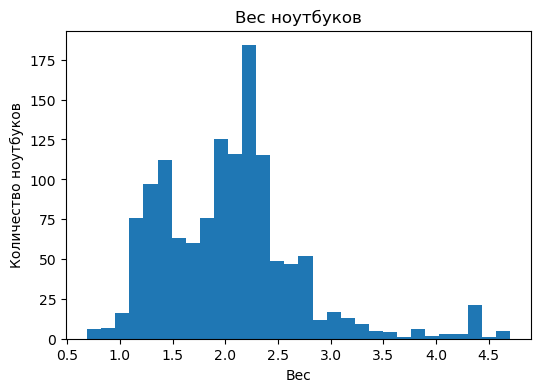

In [6]:
plt.figure(figsize=(6, 4))
plt.hist(df['Weight'], bins=30)
plt.title('Вес ноутбуков')
plt.xlabel('Вес')
plt.ylabel('Количество ноутбуков')

## Задание 2.
### 2.1 Изучите распределение типов носителя

In [25]:
memory = df["Memory_Type"].value_counts()
memory.head()

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

In [26]:
names = memory.index
values = memory.values

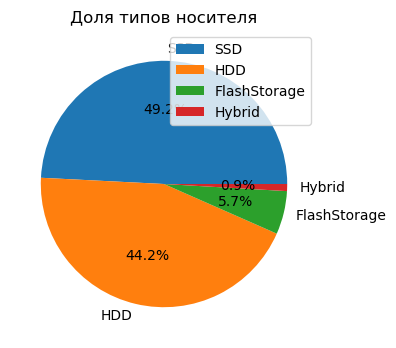

In [27]:
plt.figure(figsize=(6, 4))
plt.pie(values, autopct='%1.1f%%', labels=names)
plt.title('Доля типов носителя')
plt.legend(names, loc='upper right'); 

### 2.2 Изучите распределение компаний производителей

In [28]:
data = df['Company'].value_counts()

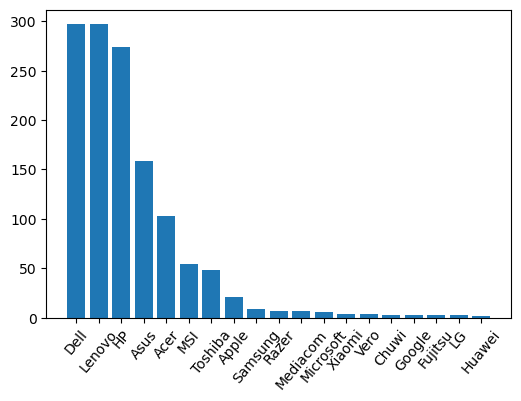

In [29]:
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

### 2.3 Изучите распределение операционной системы

In [30]:
data = df['OpSys'].value_counts()

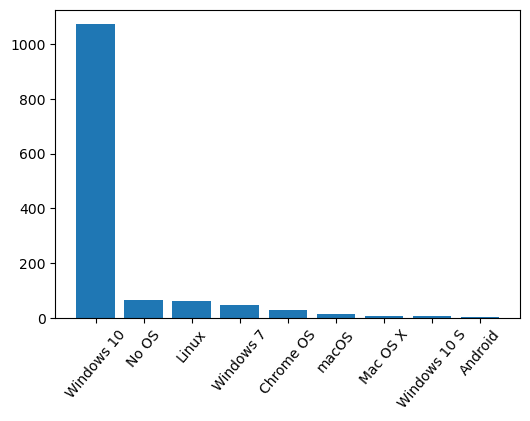

In [31]:
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

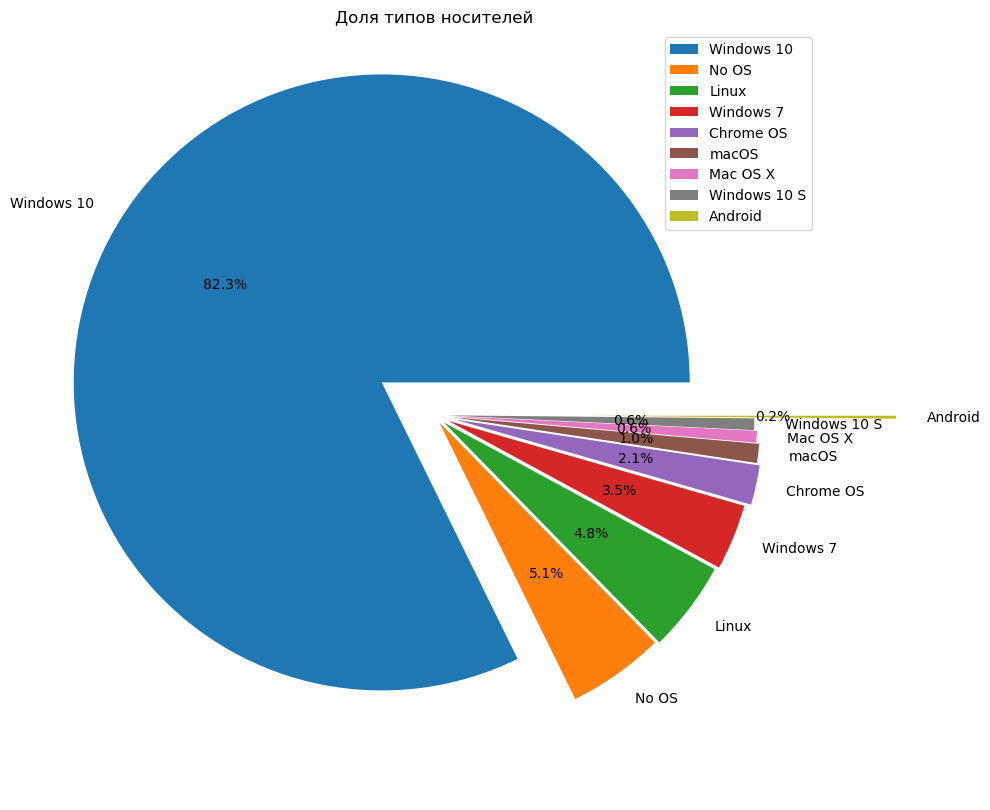

In [32]:
plt.figure(figsize=(10, 10))
expl = [0.2, 0.03, 0.04, 0.05, 0.07, 0.06, 0.05, 0.04, 0.5]
plt.pie(data.values, autopct='%1.1f%%', labels=data.index, explode=expl)
plt.title('Доля типов носителей')
plt.legend(data.index, loc='best');

### 2.4 Изучите распределение компаний производителей CPU

In [33]:
data = df['Cpu_Company'].value_counts()

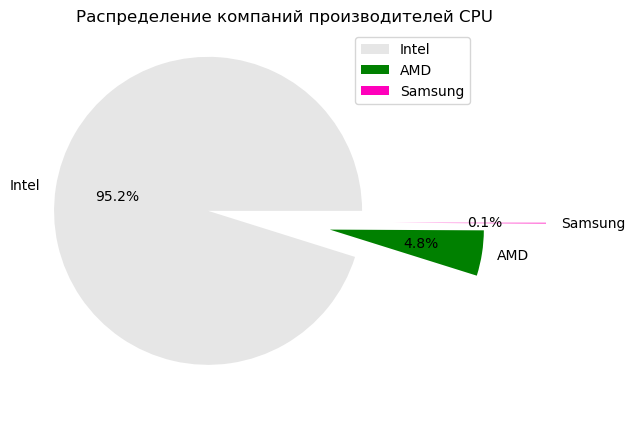

In [34]:
plt.figure(figsize=(5, 5))
explode = [0.5, 0.3, 0.7]
plt.pie(data.values, autopct='%1.1f%%', labels=data.index, explode=explode, colors = ["0.9", "g", "#FF00BB",])
plt.title('Распределение компаний производителей CPU')
plt.legend(data.index, loc='best');

## Задание 3.
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму

Процессоры от Samsung не изучайте

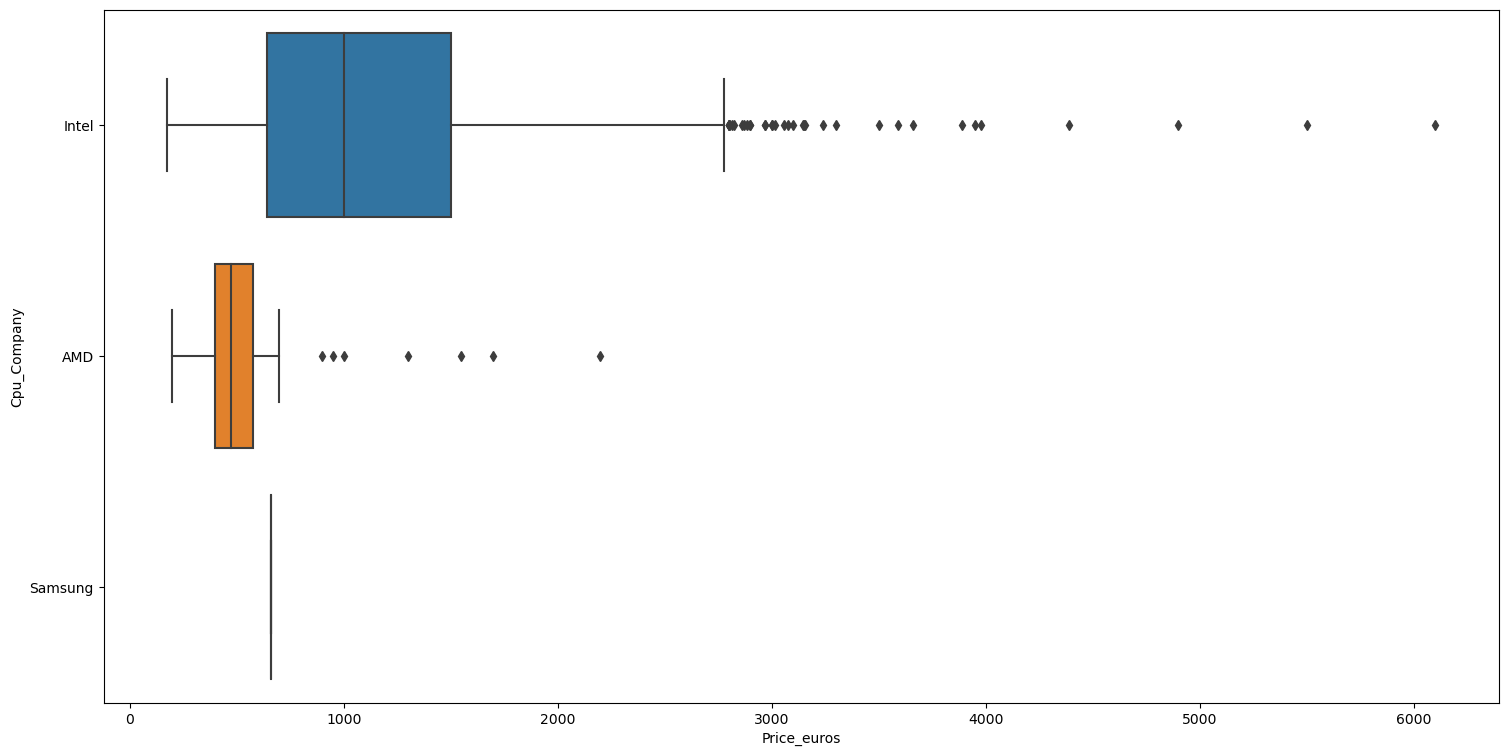

In [35]:
plt.figure(figsize=(18, 9))

sns.boxplot(x=df['Price_euros'], y=df["Cpu_Company"], whis=1.5)

plt.xlabel('Price_euros')
plt.show()

### 3.1 Постройте график в абсолютных величинах

In [36]:
data = pd.crosstab(df['Company'], df['Cpu_Company'])
data

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,10,93,0
Apple,0,21,0
Asus,11,147,0
Chuwi,0,3,0
Dell,0,297,0
Fujitsu,0,3,0
Google,0,3,0
HP,25,249,0
Huawei,0,2,0


In [37]:
data = data.drop('Samsung', axis=1).reset_index()
data.head()

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297


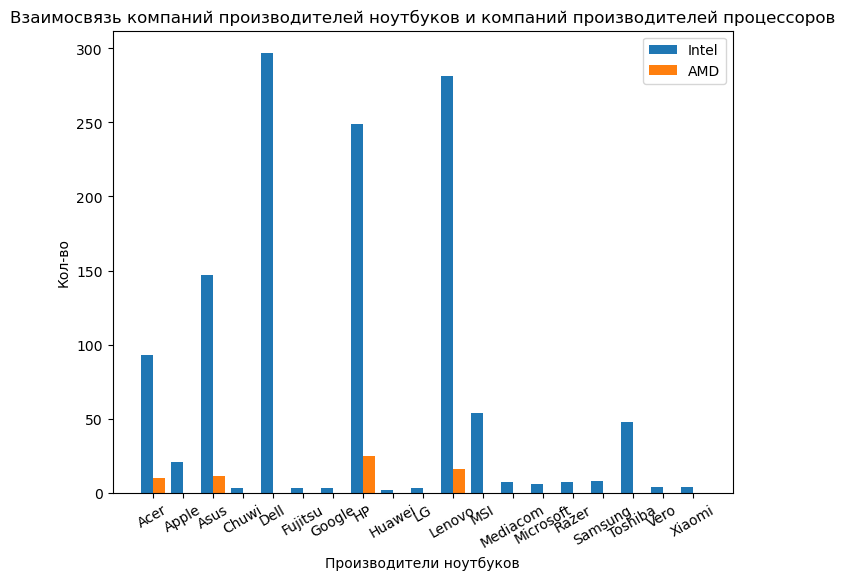

In [38]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['Intel']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['Intel'], width=w)
plt.bar(n_ticks + offset, data['AMD'], width=w)

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data['Company'], rotation = 30);  # добавляем метки делений

In [39]:
n_ticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

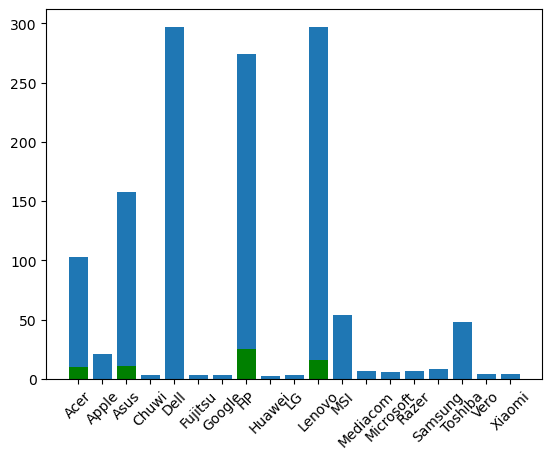

In [40]:
df_company_process = pd.crosstab(df['Company'], df['Cpu_Company'])
df_company_process.drop('Samsung', axis=1, inplace = True)
plt.bar(df_company_process.index,df_company_process['AMD'], color='green')
plt.bar(df_company_process.index,df_company_process['Intel'], bottom = df_company_process['AMD'])

plt.xticks(rotation = 45);

### 3.2 Постройте график в относительных величинах

In [41]:
data = pd.crosstab(df['Company'], df['Cpu_Company'], normalize='index')
data

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,0.097087,0.902913,0.000000
Apple,0.000000,1.000000,0.000000
Asus,0.069620,0.930380,0.000000
Chuwi,0.000000,1.000000,0.000000
Dell,0.000000,1.000000,0.000000
Fujitsu,0.000000,1.000000,0.000000
Google,0.000000,1.000000,0.000000
HP,0.091241,0.908759,0.000000
Huawei,0.000000,1.000000,0.000000


In [42]:
data = data.drop('Samsung', axis=1).reset_index()
data.head()

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000


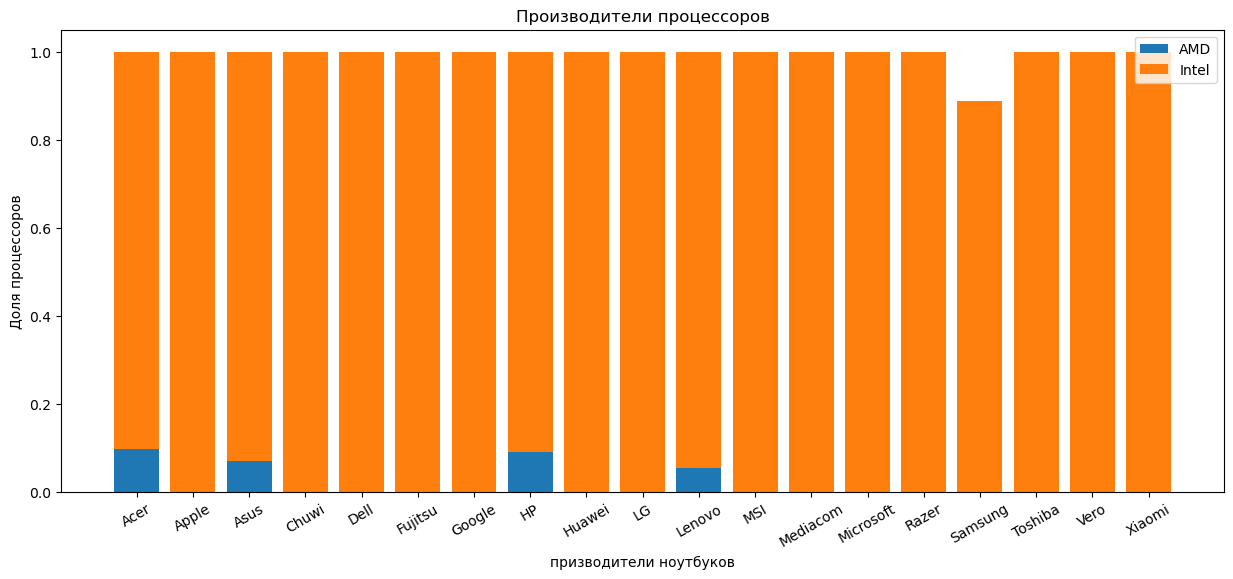

In [43]:
plt.figure(figsize=(15, 6))

plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])

plt.title('Производители процессоров')
plt.xlabel('призводители ноутбуков')
plt.ylabel('Доля процессоров')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation = 30);

## Задание 4.
### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

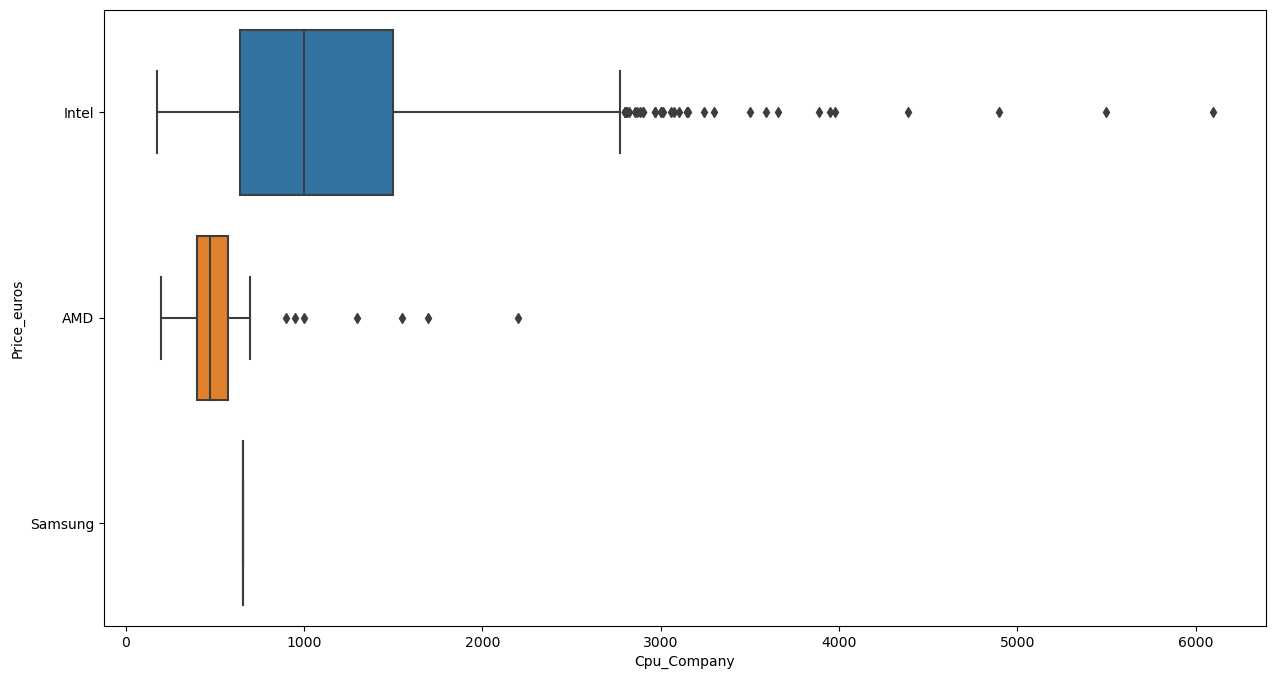

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Cpu_Company"], x=df["Price_euros"], whis=1.5)
plt.xlabel("Cpu_Company")
plt.ylabel("Price_euros");